In [1]:
 import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas Dataframe

In [2]:
df = pd.read_csv('data/train.csv')

Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group D,master's degree,standard,none,62,70,75
1,female,group C,bachelor's degree,free/reduced,completed,66,83,83
2,female,group D,some college,free/reduced,none,79,89,86
3,male,group C,master's degree,free/reduced,none,61,67,66
4,male,group E,high school,standard,none,73,64,57


Shape

In [4]:
df.shape

(800, 8)

Data information

1. gender: sex of students ->(male/female)
2. race_ethnicity: Ethnicity of students-> (Group A, B,C,D,E)
3. parental_level_of_education: parents' final education->(bachelor's degree, some college,master's degree, associate's degree, high school)
4. lunch: having lunch before test(standard or free/ reduced)
5. test preparation course: complete or not complete before test
6. math score
7. reading score
8. writing score



# 3. Data Check to perform

1. Check Missing values
2. Check Duplicates
3. Check data type
4. Check the number of unique values of each column
5. Check Statistics of data set
6. Check various categories present in the different categorical column


3.1 Check Missing values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       800 non-null    object
 1   race_ethnicity               800 non-null    object
 2   parental_level_of_education  800 non-null    object
 3   lunch                        800 non-null    object
 4   test_preparation_course      800 non-null    object
 5   math_score                   800 non-null    int64 
 6   reading_score                800 non-null    int64 
 7   writing_score                800 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 50.1+ KB


In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     77
reading_score                  69
writing_score                  71
dtype: int64

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,800.000000,800.000000,800.000000
mean,66.496250,69.555000,68.456250
std,15.024302,14.461532,15.085342
min,8.000000,24.000000,15.000000
25%,57.000000,60.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [12]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group D' 'group C' 'group E' 'group B' 'group A']
Categories in'parental level of education' variable: ["master's degree" "bachelor's degree" 'some college' 'high school'
 "associate's degree" 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [21]:
numeric_features

['math_score', 'reading_score', 'writing_score']

# 3.8 Adding columns for "Total Score" and "Average"

In [14]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group D,master's degree,standard,none,62,70,75,207,69.000000
1,female,group C,bachelor's degree,free/reduced,completed,66,83,83,232,77.333333
2,female,group D,some college,free/reduced,none,79,89,86,254,84.666667
3,male,group C,master's degree,free/reduced,none,61,67,66,194,64.666667
4,male,group E,high school,standard,none,73,64,57,194,64.666667


In [15]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 6
Number of students with full marks in Writing: 13
Number of students with full marks in Reading: 17


In [16]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 2
Number of students with less than 20 marks in Writing: 1
Number of students with less than 20 marks in Reading: 0


 # Visualization

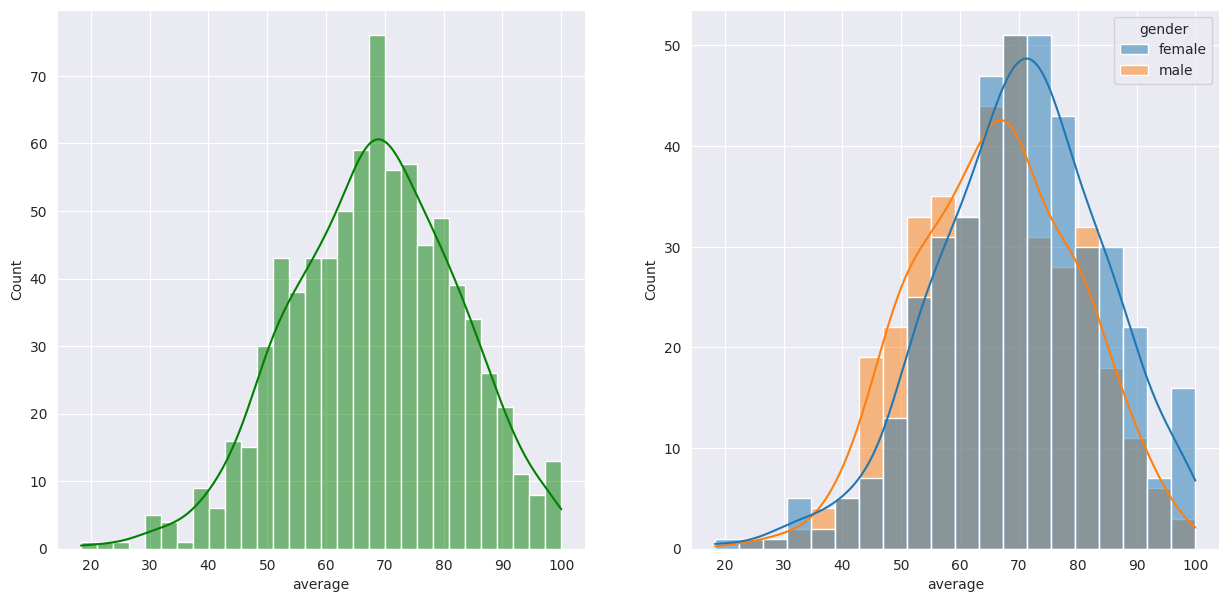

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

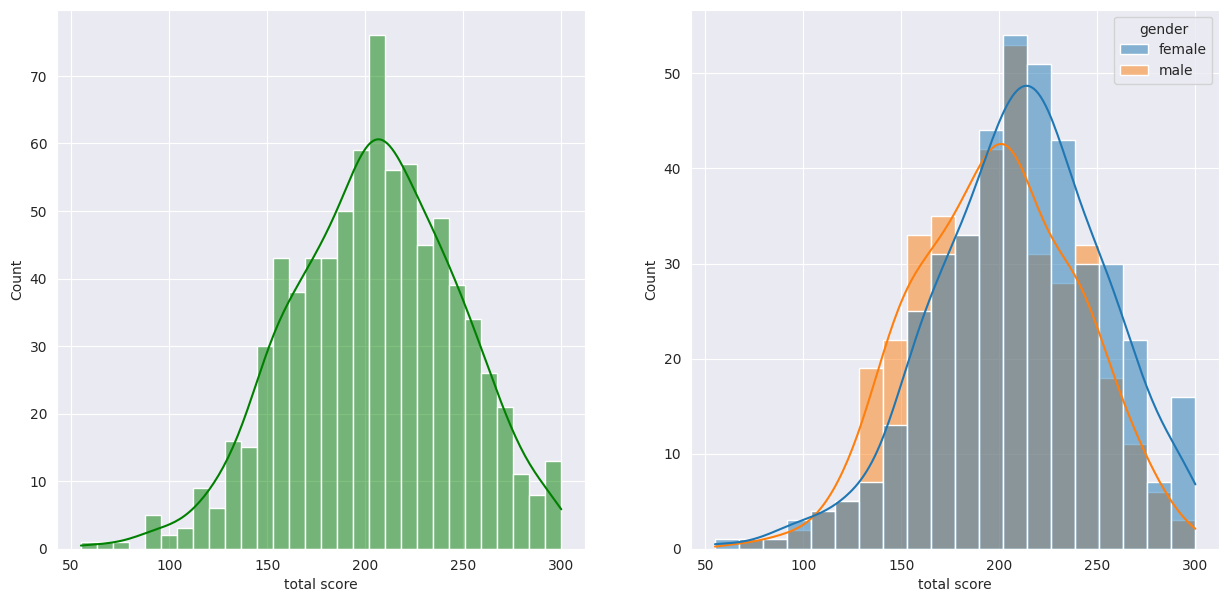

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

Insights

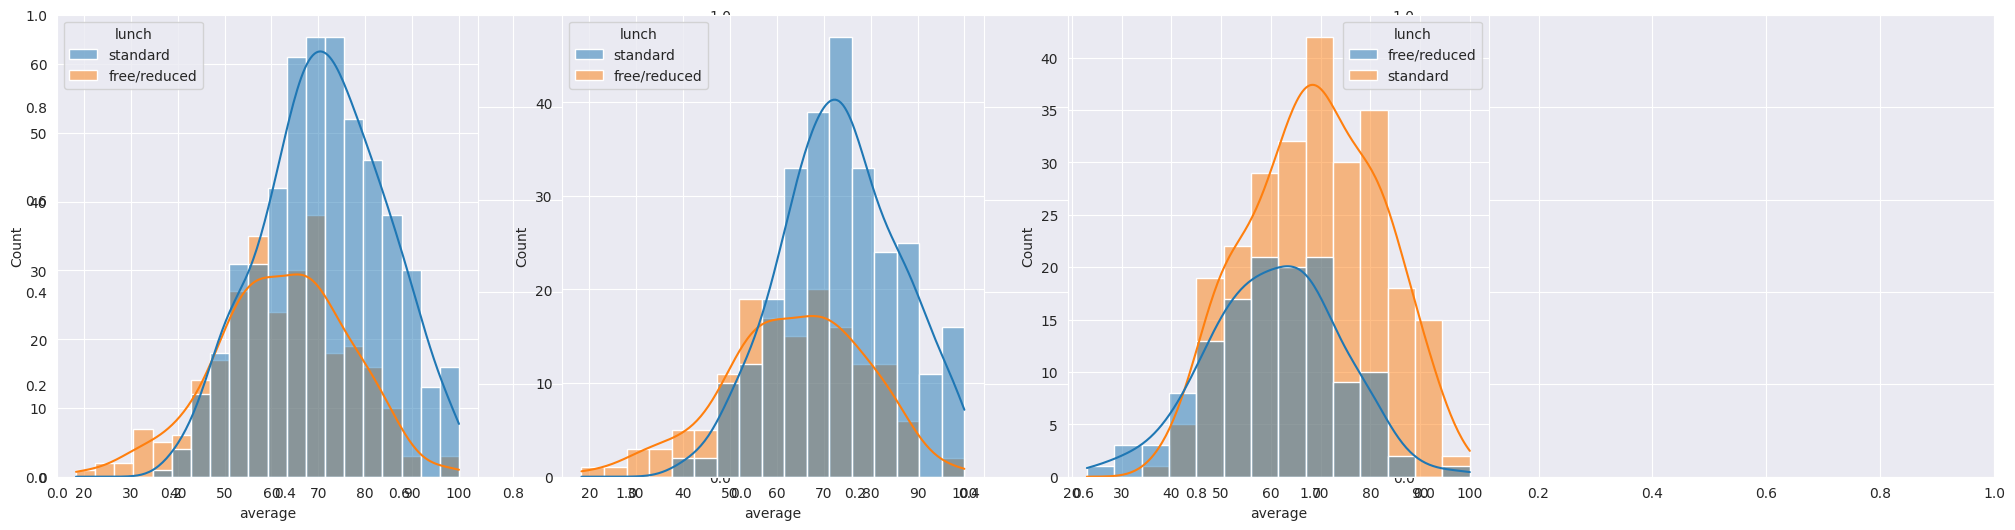

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()